## LIBS
- pip install pmdarima

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Magic Function
%matplotlib inline

# Customizando Figuras
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from pmdarima import auto_arima

In [11]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(
    'AirPassengers.csv', parse_dates=['Month'],
    index_col='Month', date_parser=dateparse
)
data.head()

C:\Users\glauc\AppData\Local\Temp\ipykernel_13656\180487480.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [13]:
data.shape

(144, 1)

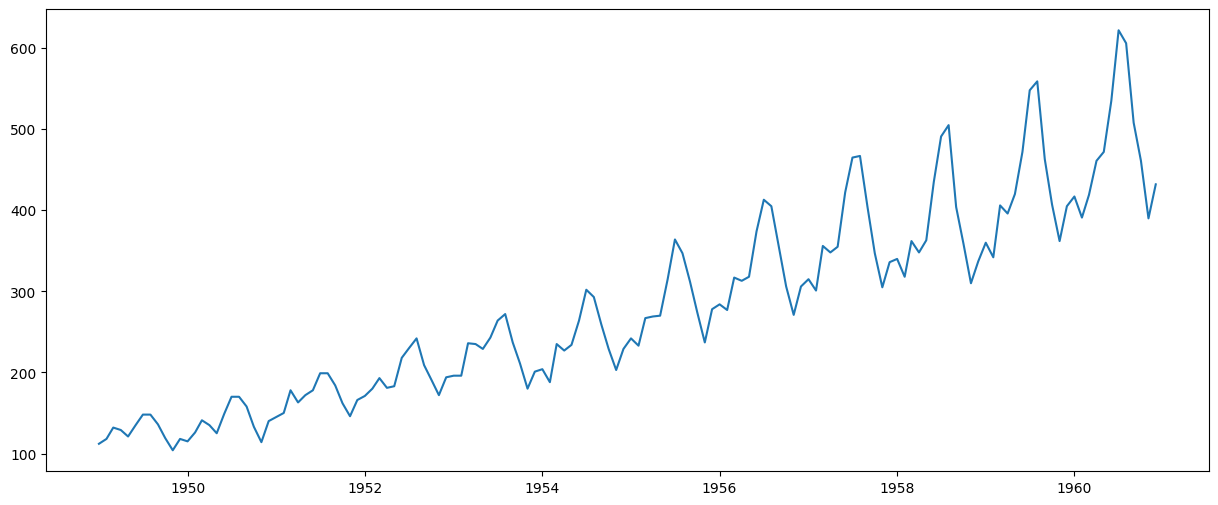

In [14]:
plt.plot(data)

## Modelo

## ARIMA
PARÂMETROS  
- Ordem parte auto regressiva -> AR (p)
- Grau de diferenciação -> I (d)
- Ordem média móvel -> MA (q)  
Devido a complexidade para a definição destes parâmetros, e mesmo  
utilizando de técnicas, as grandes chances de fracasso,  
utilizamos o AUTO ARIMA  
  
P, D, Q (maiusculos) indicam parametros da parte SAZIONAL
- start- -> Valores iniciais para realizar os testes de definição de parametros
- max_ -> Valores máximos para realizar os testes de definição de parametros
- m= -> Intervalos de tempo da amostra (12 | Por serem meses)
- trace= -> Indica saida do processo para observação
- stepwise= -> Otimiza a criação do modelo (diminui qtd de etapas e analises)

In [15]:
modelo = auto_arima(
    data,
    start_p=1, start_q=1, start_d=0, start_P=0,
    max_p=6, max_q=6, m=12,
    seasonal=True, trace=True, stepwise=False 
)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.17 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.53 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.84 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.52 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.34 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=1.34 sec
 ARIM

ARIMA---(1,1,1)--------(0,1,1)------------------[12]  
modelo--parametros--parametros sazionais--intervalos de tempo dos dados  

AIC
metrica de performance, quanto menor o valor, MELHOR

In [16]:
# AIC com stepwise=True
# 1019.1780567487527

# AIC com stepwise=False
# 1012.9907964658952

print(modelo.aic())

1012.9907964658952


## DADOS | Treino e teste

In [17]:
treino = data.loc['1949-01-01':'1959-12-01']
treino

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [18]:
teste = data.loc['1960-01-01':]
teste

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


## Treinando Modelo

In [19]:
modelo.fit(treino)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

## Prevendo Próximo ano (1960)

In [20]:
predicao = modelo.predict(n_periods=12)
predicao

1960-01-01    420.238362
1960-02-01    398.454180
1960-03-01    461.909292
1960-04-01    450.690642
1960-05-01    474.008026
1960-06-01    537.921141
1960-07-01    612.240446
1960-08-01    623.592746
1960-09-01    520.171308
1960-10-01    462.320957
1960-11-01    412.932481
1960-12-01    453.756031
Freq: MS, dtype: float64

## Analisando Performance

In [21]:
predicao = pd.DataFrame(predicao, index=teste.index, columns=['#Passengers'])
predicao

,#Passengers
Month,
1960-01-01,420.238362
1960-02-01,398.454180
1960-03-01,461.909292
1960-04-01,450.690642
1960-05-01,474.008026
1960-06-01,537.921141
1960-07-01,612.240446
1960-08-01,623.592746
1960-09-01,520.171308


### Cores Pré Definidas
- azul -> Dados de Teste
- laranja -> Prediçao

<Axes: xlabel='Month'>

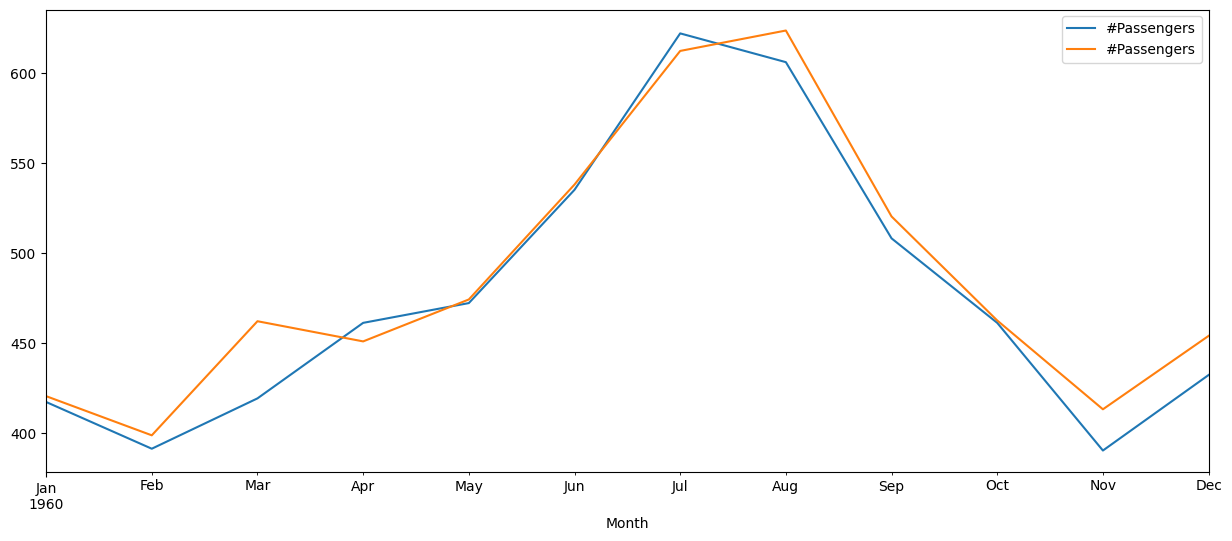

In [22]:
pd.concat([teste, predicao], axis=1).plot()

<Axes: xlabel='Month'>

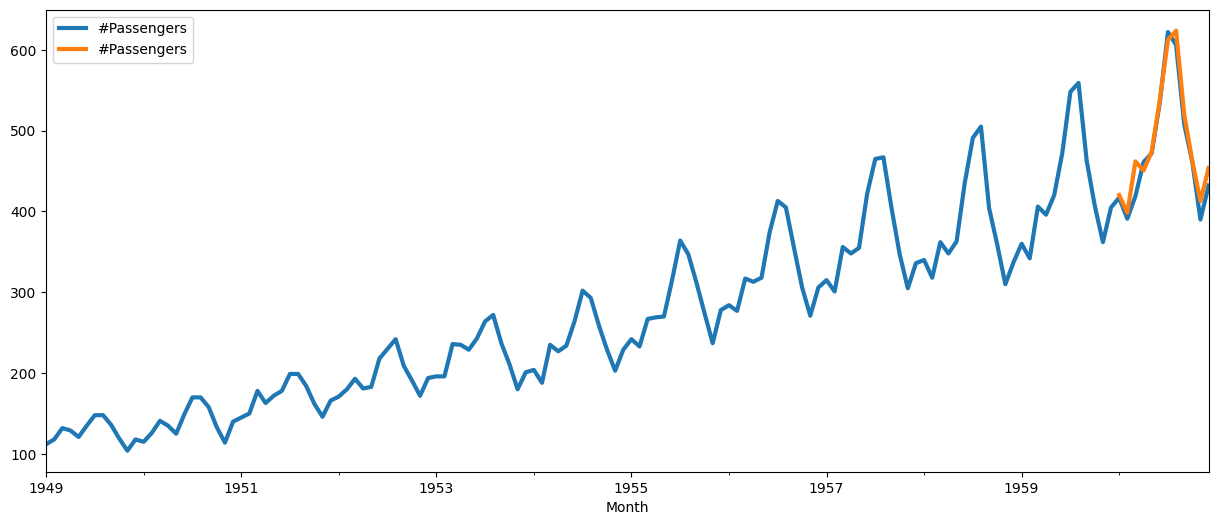

In [23]:
pd.concat([data, predicao], axis=1).plot(linewidth=3)